In [69]:
import pandas as pd
import numpy as np
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns


In [ ]:
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)

In [56]:
us_aid = pd.read_csv('C:/Users/My/us_aidd.csv', parse_dates=True)

In [57]:
us_aid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443129 entries, 0 to 443128
Data columns (total 7 columns):
Activity               443126 non-null object
Country                443129 non-null object
Implementing_agency    443129 non-null object
Sector                 443129 non-null object
Funding_ac             443129 non-null object
Fiscal_year            443129 non-null int64
Current_amount         443129 non-null int64
dtypes: int64(2), object(5)
memory usage: 15.2+ MB


In [58]:
us_aid = us_aid.loc[us_aid.Current_amount>=0, ]         #filtering positive amounts
#us_aid.info()
us_aid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428470 entries, 0 to 428469
Data columns (total 7 columns):
Activity               428467 non-null object
Country                428470 non-null object
Implementing_agency    428470 non-null object
Sector                 428470 non-null object
Funding_ac             428470 non-null object
Fiscal_year            428470 non-null int64
Current_amount         428470 non-null int64
dtypes: int64(2), object(5)
memory usage: 18.0+ MB


In [55]:
us_aid.loc[us_aid.Activity.isnull(), ]


,Activity,Country,Implementing_agency,Sector,Funding_ac,Fiscal_year,Current_amount
230716,NaN,Bolivia,Inter-American Foundation,Mineral Resources and Mining,Inter-American Foundation,2016,64766
277368,NaN,El Salvador,Inter-American Foundation,Agriculture,Inter-American Foundation,2016,34150
277481,NaN,Haiti,Inter-American Foundation,Basic Education,Inter-American Foundation,2016,34093


In [60]:
us_aid.Activity[us_aid.Activity.isnull()] = 'Unknown'  #dont run it more than once


In [88]:
print (us_aid.loc[us_aid.Fiscal_year==2017, ].shape)
print (us_aid.loc[us_aid.Fiscal_year==2016, ].shape)
us_aid.loc[us_aid.Fiscal_year==2015, ].shape

(21640, 7)
(28040, 7)


(27310, 7)

Visualizations

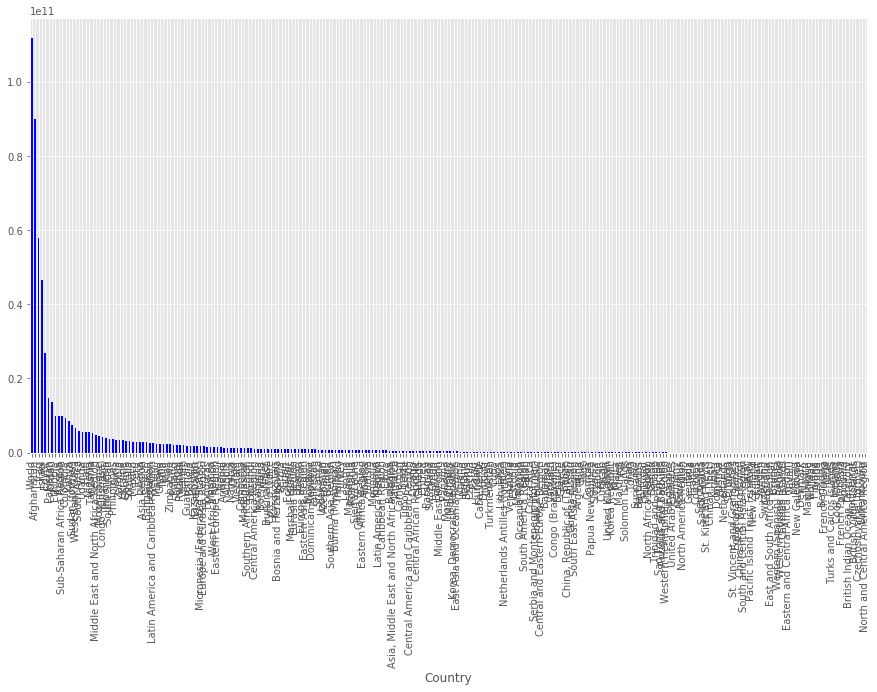

In [23]:
plt.figure(figsize=(15,8))
x=us_aid.groupby('Country')['Current_amount'].sum().sort_values(ascending=False)
x.plot.bar(color='b')

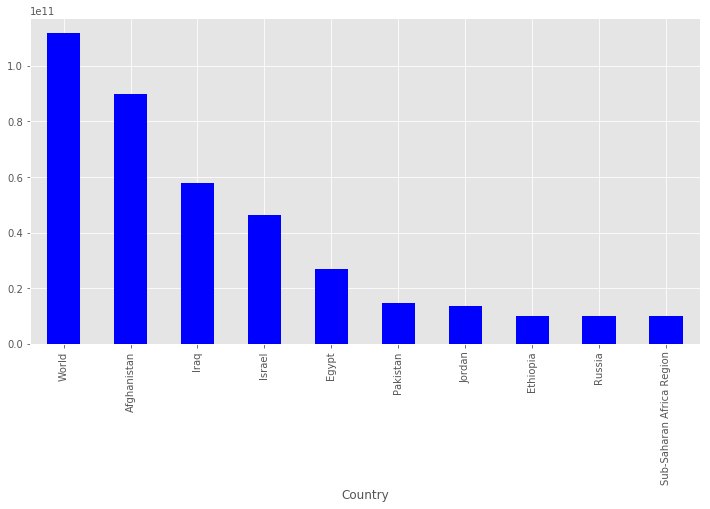

In [24]:
plt.figure(figsize=(12,6))
x=us_aid.groupby('Country')['Current_amount'].sum().sort_values(ascending=False).head(10)
x.plot.bar(color='b')

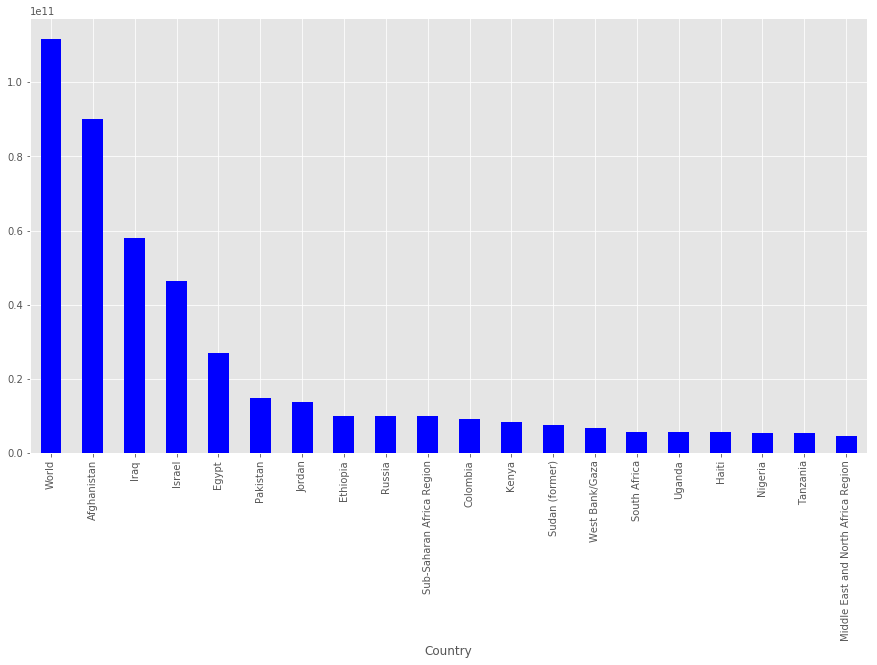

In [27]:
plt.figure(figsize=(15,8))
x=us_aid.groupby('Country')['Current_amount'].sum().sort_values(ascending=False).head(20)
x.plot.bar(color='b')

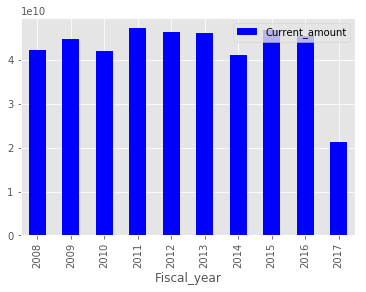

In [33]:
#for last 10 years
year_bar = us_aid.groupby('Fiscal_year')[['Current_amount']].sum().tail(10)
year_bar.plot.bar(color='b')

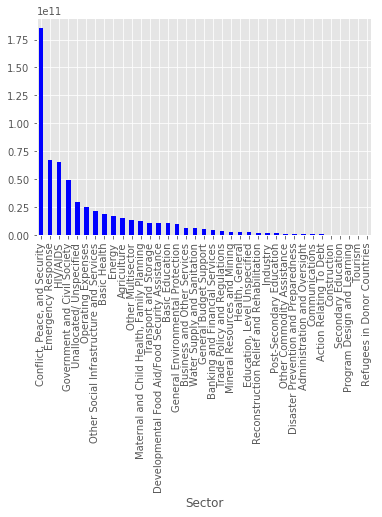

In [48]:
sector_bar = us_aid.groupby('Sector')['Current_amount'].sum().sort_values(ascending=False)
sector_bar.plot.bar(color='b')


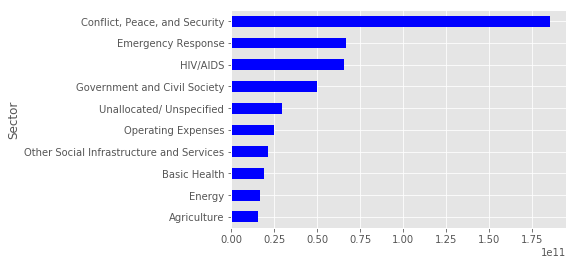

In [44]:
sector_barh = us_aid.groupby('Sector')['Current_amount'].sum().sort_values().tail(10)
sector_barh.plot(kind='barh', color='b')

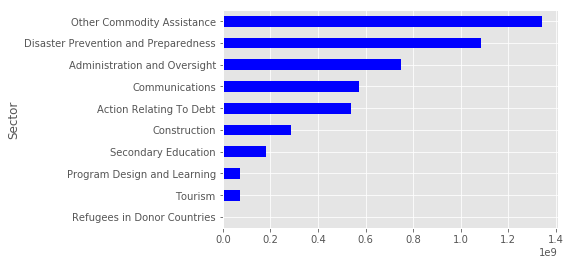

In [45]:
sector_bar = us_aid.groupby('Sector')['Current_amount'].sum().sort_values().head(10)
sector_bar.plot.barh(color='b')

In [64]:
swarm1 = us_aid.groupby(['Country','Sector'])['Current_amount'].sum().sort_values(ascending=False)
swarm1.shape
sns.swarmplot("Country", "Current_amount", swarm1, hue="Sector", palette="Set2")

TypeError: swarmplot() got multiple values for argument 'hue'

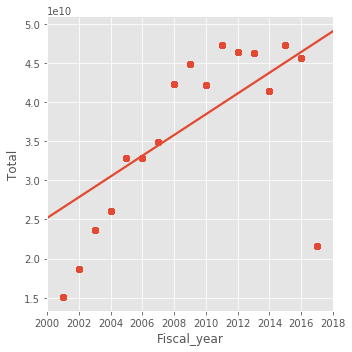

In [78]:

us_aid_year = us_aid.copy()
us_aid_year['Total'] = us_aid_year.groupby(['Fiscal_year'])['Current_amount'].transform(np.sum)
sns.lmplot("Fiscal_year", "Total", us_aid_year, palette="Set2")  #find sum and plot

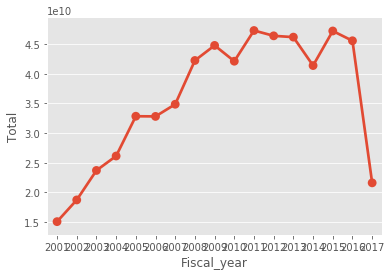

In [81]:
sns.pointplot(x="Fiscal_year", y="Total", data=us_aid_year)  #find sum and plot

In [91]:
us_aid_cyear = us_aid.copy()
us_aid_cyear['Total'] = us_aid_cyear.groupby(['Fiscal_year', 'Country'])['Current_amount'].transform(np.sum)
#us_aid_cyear.info()

In [92]:
sns.pointplot("Fiscal_year", "Total", us_aid_cyear, hue="Country", palette="Set2")  #find sum and plot

TypeError: pointplot() got multiple values for argument 'hue'

plot for each year (last three years)

In [76]:
#us_aid = us_aid.drop('Total', axis=1)

In [93]:
us_aid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428470 entries, 0 to 428469
Data columns (total 7 columns):
Activity               428470 non-null object
Country                428470 non-null object
Implementing_agency    428470 non-null object
Sector                 428470 non-null object
Funding_ac             428470 non-null object
Fiscal_year            428470 non-null int64
Current_amount         428470 non-null int64
dtypes: int64(2), object(5)
memory usage: 34.0+ MB
